In [4]:
#Importing the libraries
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from pmdarima import auto_arima 
import warnings 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [ ]:
pip install nsepy

In [3]:
pip install pmdarima

  Using cached pmdarima-1.8.5-cp38-cp38-win_amd64.whl (602 kB)
  Using cached statsmodels-0.13.2-cp38-cp38-win_amd64.whl (9.1 MB)
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0
  Using cached pmdarima-1.8.5-cp38-cp38-win_amd64.whl (602 kB)
  Using cached statsmodels-0.13.2-cp38-cp38-win_amd64.whl (9.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
#Setting start and end dates and fetching the historical data
start = dt.datetime(2013,1,1)
end = dt.datetime(2019,12,31)
stk_data = gh(symbol='SBIN',start=start,end=end)

In [6]:
#Data Preprocessing
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [7]:
data2

,Date,Open,High,Low,Close
Date,,,,,
2013-01-01,2013-01-01,2404.90,2434.05,2397.55,2426.45
2013-01-02,2013-01-02,2450.00,2464.00,2438.15,2450.55
2013-01-03,2013-01-03,2460.00,2482.40,2436.20,2471.60
2013-01-04,2013-01-04,2460.00,2492.95,2450.65,2486.70
2013-01-07,2013-01-07,2490.00,2499.00,2461.75,2467.60
...,...,...,...,...,...
2019-12-24,2019-12-24,333.20,334.20,329.20,331.45
2019-12-26,2019-12-26,333.00,333.45,328.10,329.85
2019-12-27,2019-12-27,333.40,338.35,333.00,337.25


In [8]:
#####################ARIMA###############################
# Ignore harmless warnings 
warnings.filterwarnings("ignore") 

In [9]:
# Fit auto_arima function to Stock Market Data
stepwise_fit = auto_arima(data2['Close'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True, d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True, stepwise = True)   

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=7.50 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=23413.001, Time=0.18 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=19984.430, Time=5.57 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=21892.741, Time=5.90 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=23418.859, Time=0.14 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=20446.815, Time=1.34 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=19796.609, Time=23.39 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=24.82 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=6.45 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=23409.107, Time=9.25 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=19796.264, Time=32.70 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=19981.493, Time=7.52 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=29.35 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=10.50 sec
 ARIMA(3,0,0)(2,1,0)[12] inter

In [10]:
# Split data into train / test sets 
train = data2.iloc[:len(data2)-150] 
test = data2.iloc[len(data2)-150:]

In [11]:
# Fit a SARIMAX
model = SARIMAX(data2['Close'],  order = (0, 1, 1),  seasonal_order =(2, 1, 1, 12)) 

In [12]:
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1728
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -9664.538
Date:                            Mon, 28 Mar 2022   AIC                          19339.075
Time:                                    20:10:04   BIC                          19366.311
Sample:                                         0   HQIC                         19349.154
                                           - 1728                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0206      0.027      0.762      0.446      -0.032       0.074
ar.S.L12      -0.0202      0.106     -0.191      0.849      -0.227       0.187
ar.S.L24      -0.0162      0.068     -0.238      0.812      -0.150       0.118
ma.S.L12      -0.9999      2.849     -0.351      0.726      -6.583       4.583
sigma2      4435.9254   1.26e+04      0.352      0.725   -2.03e+04    2.91e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         123143122.48
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                           -33.86
Prob(H) (two-sided):                  0.00   Kurtosis:                      1313.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:

start = len(train) 
end = len(train) + len(test) - 1

In [14]:
# Predictions for one-year against the test set 
predictions = result.predict(start, end, typ = 'levels').rename("Predictions") 

<AxesSubplot:xlabel='Date'>

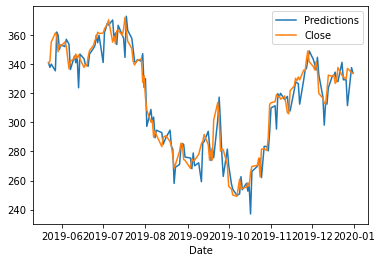

In [15]:
# plot predictions and actual values 
predictions.plot(legend = True) 
test['Close'].plot(legend = True)

In [19]:
#############LSTM########################
train_set = data2.iloc[0:1333:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1333):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


'''#Defining the LSTM Recurrent Model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))


#Compiling and fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)'''

"#Defining the LSTM Recurrent Model\nregressor = Sequential()\nregressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))\nregressor.add(Dropout(0.2))\nregressor.add(LSTM(units = 50, return_sequences = True))\nregressor.add(Dropout(0.2))\nregressor.add(LSTM(units = 50, return_sequences = True))\nregressor.add(Dropout(0.2))\nregressor.add(LSTM(units = 50))\nregressor.add(Dropout(0.2))\nregressor.add(Dense(units = 1))\n\n\n#Compiling and fitting the model\nregressor.compile(optimizer = 'adam', loss = 'mean_squared_error')\nregressor.fit(X_train, y_train, epochs = 15, batch_size = 32)"

In [20]:
#Defining the LSTM Recurrent Model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [21]:
#Compiling and fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
40/40 [==============================] - 26s 178ms/step - loss: 0.0249
Epoch 2/15
40/40 [==============================] - 7s 172ms/step - loss: 0.0097
Epoch 3/15
40/40 [==============================] - 7s 165ms/step - loss: 0.0092
Epoch 4/15
40/40 [==============================] - 7s 181ms/step - loss: 0.0087
Epoch 5/15
40/40 [==============================] - 7s 178ms/step - loss: 0.0072
Epoch 6/15
40/40 [==============================] - 7s 170ms/step - loss: 0.0075
Epoch 7/15
40/40 [==============================] - 7s 176ms/step - loss: 0.0061
Epoch 8/15
40/40 [==============================] - 7s 175ms/step - loss: 0.0068
Epoch 9/15
40/40 [==============================] - 7s 173ms/step - loss: 0.0052
Epoch 10/15
40/40 [==============================] - 7s 177ms/step - loss: 0.0050
Epoch 11/15
40/40 [==============================] - 7s 176ms/step - loss: 0.0053 0s - loss: 0.0
Epoch 12/15
40/40 [==============================] - 7s 175ms/step - loss: 0.0052 5s - loss

In [22]:
#Fetching the test data and preprocessing
testdataframe = gh(symbol='SBIN',start=dt.datetime(2018,5,23),end=dt.datetime(2018,12,31))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



Exception in thread Exception in thread Thread-50:
Traceback (most recent call last):
  File "C:\Users\PREETHI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
Thread-51:
Traceback (most recent call last):
  File "C:\Users\PREETHI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 670, in urlopen
        httplib_response = self._make_request(
  File "C:\Users\PREETHI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 426, in _make_request
httplib_response = self._make_request(
  File "C:\Users\PREETHI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\PREETHI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 421, in _make_request
  File "C:\Users\PREETHI\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 421, in _make_request
    http

r = adapter.send(request, **kwargs)
  File "C:\Users\PREETHI\anaconda3\lib\site-packages\requests\adapters.py", line 498, in send
    raise ConnectionError(err, request=request)
requests.exceptions.ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


AttributeError: 'ThreadReturns' object has no attribute 'result'

In [18]:
#Making predictions on the test data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

NameError: name 'X_test' is not defined

In [24]:
#Fetching the test data and preprocessing
testdataframe = gh(symbol='SBIN',start=dt.datetime(2019,1,1),end=dt.datetime(2019,9,18))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [25]:
#Making predictions on the test data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

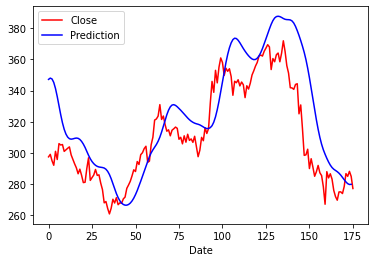

In [26]:
#Visualizing the prediction
plt.figure()
plt.plot(real_stock_price, color = 'r', label = 'Close')
plt.plot(predicted_stock_price, color = 'b', label = 'Prediction')
plt.xlabel('Date')
plt.legend()
plt.show()

In [27]:
######RMSE#######
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

In [28]:
# RMSE for ARIMA model
err_ARIMA = rmse(test["Close"], predictions) 
print('RMSE with ARIMA', err_ARIMA)

RMSE with ARIMA 9.66349312313635


In [29]:
#RMSE for LSTM Model
err_LSTM = rmse(test["Close"], predicted_stock_price)
print('RMSE with LSTM', err_LSTM)

RMSE with LSTM [39.34133631 39.82392611 47.22338628 51.62270815 50.43961711 43.11216763
 46.0592228  45.39930306 47.28923064 45.33722086 37.7376416  39.75667123
 40.81177116 42.25550968 40.66548042 41.93458432 40.56889267 38.06575571
 38.90411874 38.43348779 41.23529686 43.54044002 45.83763275 48.02130447
 49.11064696 51.94978872 51.29748965 51.51409334 53.68679008 54.9336459
 55.892146   58.43582778 47.19050912 50.05112686 46.47493735 52.7200231
 53.01597237 50.43961711 53.57452049 59.83383753 53.053062   47.65349944
 44.39265362 39.82392611 38.72394483 39.42723662 40.00546939 40.56889267
 35.71610464 36.43669622 36.27499664 38.9320397  42.9258391  42.29268344
 49.46980872 46.48702432 48.47318591 54.22729889 49.57418472 48.7800492
 51.63631702 53.96358377 58.84829352 66.11579086 63.98089501 56.64282022
 52.47600238 53.06699393 61.18383034 61.71388254 66.24228723 60.69662125
 62.16416672 61.63218656 58.37140041 52.80775771 51.49150882 48.23606722
 53.21559545 61.63218656 56.48730236 61

In [30]:
print('RMSE with LSTM', err_LSTM)

RMSE with LSTM [39.34133631 39.82392611 47.22338628 51.62270815 50.43961711 43.11216763
 46.0592228  45.39930306 47.28923064 45.33722086 37.7376416  39.75667123
 40.81177116 42.25550968 40.66548042 41.93458432 40.56889267 38.06575571
 38.90411874 38.43348779 41.23529686 43.54044002 45.83763275 48.02130447
 49.11064696 51.94978872 51.29748965 51.51409334 53.68679008 54.9336459
 55.892146   58.43582778 47.19050912 50.05112686 46.47493735 52.7200231
 53.01597237 50.43961711 53.57452049 59.83383753 53.053062   47.65349944
 44.39265362 39.82392611 38.72394483 39.42723662 40.00546939 40.56889267
 35.71610464 36.43669622 36.27499664 38.9320397  42.9258391  42.29268344
 49.46980872 46.48702432 48.47318591 54.22729889 49.57418472 48.7800492
 51.63631702 53.96358377 58.84829352 66.11579086 63.98089501 56.64282022
 52.47600238 53.06699393 61.18383034 61.71388254 66.24228723 60.69662125
 62.16416672 61.63218656 58.37140041 52.80775771 51.49150882 48.23606722
 53.21559545 61.63218656 56.48730236 61